In [10]:
# Import the dependecies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000,90.000,size=1500)
lngs = np.random.uniform(-180.000,180.000,size=1500)
lat_lngs = zip(lats,lngs)

lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [13]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [15]:
# Import dependencies
import requests
from config import weather_api_key

In [16]:
url = 'http://api.openweathermap.org/data/2.5/weather?&APPID=' + weather_api_key

In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | morris
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | saskylakh
Processing Record 4 of Set 1 | ust-kuyga
Processing Record 5 of Set 1 | bengkulu
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | zaanstad
Processing Record 8 of Set 1 | bambous virieux
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ontario
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | kaitangata
Processing Record 14 of Set 1 | inongo
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | saint george
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | caucaia
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | grindavik
Processing Record 22 of Set 1 | illoqqortoormiut
City not found. Skipping...
Pr

In [23]:
len(city_data)

569

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Morris,40.8334,-74.5329,299.38,82,75,0.89,US,2021-09-23 18:13:28
1,Ushuaia,-54.8000,-68.3000,283.94,60,65,5.37,AR,2021-09-23 18:09:12
2,Saskylakh,71.9167,114.0833,274.10,98,100,5.50,RU,2021-09-23 18:13:29
3,Ust-Kuyga,70.0167,135.6000,276.10,89,98,4.87,RU,2021-09-23 18:13:29
4,Bengkulu,-3.8004,102.2655,297.23,91,62,1.78,ID,2021-09-23 18:09:45
5,Carnarvon,-24.8667,113.6333,293.19,73,0,8.23,AU,2021-09-23 18:09:21
6,Zaanstad,52.4531,4.8125,291.16,72,75,5.66,NL,2021-09-23 18:13:31
7,Bambous Virieux,-20.3428,57.7575,294.94,80,37,7.01,MU,2021-09-23 18:09:11
8,Hermanus,-34.4187,19.2345,289.15,87,37,5.64,ZA,2021-09-23 18:13:32
9,Castro,-24.7911,-50.0119,294.40,37,51,2.62,BR,2021-09-23 18:13:11


In [21]:
# Reorder the columns
new_columns = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_columns]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Morris,US,2021-09-23 18:13:28,40.8334,-74.5329,299.38,82,75,0.89
1,Ushuaia,AR,2021-09-23 18:09:12,-54.8000,-68.3000,283.94,60,65,5.37
2,Saskylakh,RU,2021-09-23 18:13:29,71.9167,114.0833,274.10,98,100,5.50
3,Ust-Kuyga,RU,2021-09-23 18:13:29,70.0167,135.6000,276.10,89,98,4.87
4,Bengkulu,ID,2021-09-23 18:09:45,-3.8004,102.2655,297.23,91,62,1.78
5,Carnarvon,AU,2021-09-23 18:09:21,-24.8667,113.6333,293.19,73,0,8.23
6,Zaanstad,NL,2021-09-23 18:13:31,52.4531,4.8125,291.16,72,75,5.66
7,Bambous Virieux,MU,2021-09-23 18:09:11,-20.3428,57.7575,294.94,80,37,7.01
8,Hermanus,ZA,2021-09-23 18:13:32,-34.4187,19.2345,289.15,87,37,5.64
9,Castro,BR,2021-09-23 18:13:11,-24.7911,-50.0119,294.40,37,51,2.62


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

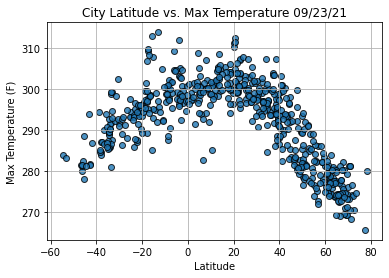

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

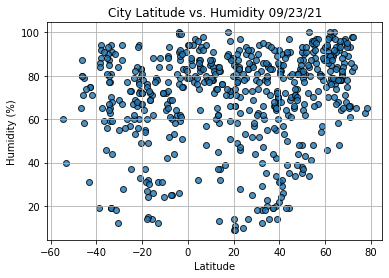

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

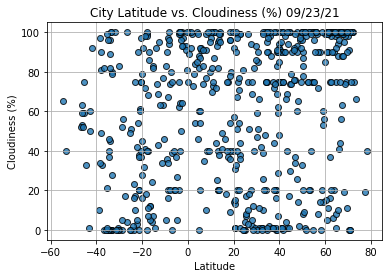

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

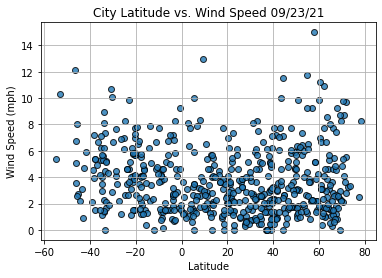

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()